In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hyper = pd.read_csv('eicu_full/patientid_hyperkalemic.csv')
lab = pd.read_csv('eicu_full/lab_squashed.csv')

In [3]:
lab

,patientunitstayid,-bands,-basos,-eos,-lymphs,-monos,-polys,24 h urine protein,24 h urine urea nitrogen,ALT (SGPT),...,total protein,transferrin,triglycerides,troponin - I,troponin - T,uric acid,urinary creatinine,urinary osmolality,urinary sodium,urinary specific gravity
0,141168,NaN,0.0,1.0,19.0,19.0,80.0,NaN,NaN,1189.0,...,7.1,NaN,NaN,0.26,NaN,8.1,173.12,NaN,12.0,NaN
1,141178,NaN,0.0,3.0,45.0,7.0,45.0,NaN,NaN,52.0,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141194,NaN,0.0,7.0,35.0,8.0,98.0,NaN,NaN,20.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018
4,141196,NaN,0.0,0.0,9.0,11.0,95.0,NaN,NaN,18.0,...,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195725,3353235,NaN,1.0,1.0,13.0,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN
195726,3353237,NaN,0.0,5.0,20.0,9.0,NaN,NaN,NaN,12.0,...,5.9,NaN,NaN,0.19,NaN,NaN,NaN,NaN,NaN,NaN
195727,3353251,NaN,1.0,1.0,13.0,14.0,NaN,NaN,NaN,272.0,...,5.2,NaN,NaN,9.38,NaN,NaN,NaN,NaN,116.0,NaN
195728,3353254,NaN,1.0,2.0,10.0,7.0,NaN,NaN,NaN,21.0,...,5.9,NaN,136.0,0.17,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
lab.dropna(axis=0, subset=['potassium'], inplace=True)

<AxesSubplot:>

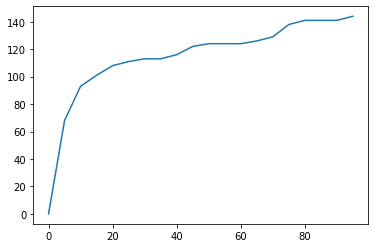

In [5]:
val = []
for thresh in range(0, 100, 5):
    sparse = lab.count(axis=0) < (lab.shape[0] * thresh/100.0)
    val.append(len(sparse[sparse].index))
sns.lineplot(y=val, x=np.arange(0, 100, 5))

In [6]:
sparse = lab.count(axis=0) < (lab.shape[0] * 0.2)
to_drop = sparse[sparse].index

trimmed_lab = lab.drop(to_drop, axis=1)
trimmed_lab

,patientunitstayid,-basos,-eos,-lymphs,-monos,-polys,ALT (SGPT),AST (SGOT),BUN,Base Excess,...,paO2,phosphate,platelets x 1000,potassium,sodium,total bilirubin,total protein,triglycerides,troponin - I,urinary specific gravity
0,141168,0.0,1.0,19.0,19.0,80.0,1189.0,4257.0,29.0,NaN,...,121.0,7.9,213.0,4.3,140.0,5.2,7.1,NaN,0.26,NaN
1,141178,0.0,3.0,45.0,7.0,45.0,52.0,40.0,11.0,NaN,...,NaN,NaN,273.0,3.6,146.0,0.4,7.4,NaN,NaN,NaN
2,141179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,...,NaN,NaN,219.0,4.2,146.0,NaN,NaN,NaN,NaN,NaN
3,141194,0.0,7.0,35.0,8.0,98.0,20.0,24.0,41.0,NaN,...,100.0,NaN,298.0,4.6,141.0,0.4,8.0,NaN,NaN,1.018
4,141196,0.0,0.0,9.0,11.0,95.0,18.0,15.0,24.0,5.0,...,70.0,NaN,534.0,4.1,138.0,0.3,7.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195725,3353235,1.0,1.0,13.0,11.0,NaN,NaN,NaN,24.0,NaN,...,NaN,NaN,133.0,4.4,137.0,NaN,NaN,92.0,0.04,NaN
195726,3353237,0.0,5.0,20.0,9.0,NaN,12.0,18.0,32.0,NaN,...,NaN,NaN,168.0,3.9,140.0,0.7,5.9,NaN,0.19,NaN
195727,3353251,1.0,1.0,13.0,14.0,NaN,272.0,264.0,91.0,8.0,...,304.0,7.3,267.0,5.1,147.0,0.5,5.2,NaN,9.38,NaN
195728,3353254,1.0,2.0,10.0,7.0,NaN,21.0,15.0,45.0,-3.0,...,57.0,3.7,268.0,5.7,144.0,0.4,5.9,136.0,0.17,NaN


In [7]:
trimmed_lab = trimmed_lab.set_index('patientunitstayid')
hyper = hyper.set_index('patientunitstayid')

In [8]:
df = hyper.join(trimmed_lab)
df.shape

(148940, 51)

In [10]:
df.dropna(axis=0, subset=['potassium'], inplace=True)

In [19]:
((df['hyperkalemic'] == False) & (df['potassium'] > 5)).sum()

8370

<AxesSubplot:>

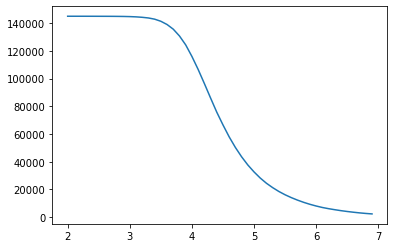

In [21]:
vals = []
for thresh in range (20, 70, 1):
    vals.append((df['potassium'] > thresh/10).sum())
sns.lineplot(np.arange(2, 7, 0.1), vals)

In [22]:
df['falsepositive'] = ((df['hyperkalemic'] == False) & (df['potassium'] > 5))
df

,hyperkalemic,-basos,-eos,-lymphs,-monos,-polys,ALT (SGPT),AST (SGOT),BUN,Base Excess,...,phosphate,platelets x 1000,potassium,sodium,total bilirubin,total protein,triglycerides,troponin - I,urinary specific gravity,falsepositive
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
141168,True,0.0,1.0,19.0,19.0,80.0,1189.0,4257.0,29.0,NaN,...,7.9,213.0,4.3,140.0,5.2,7.1,NaN,0.26,NaN,False
141203,True,0.0,0.0,20.0,7.0,93.0,20.0,37.0,11.0,2.0,...,NaN,557.0,4.2,145.0,0.5,6.6,NaN,0.02,1.026,False
141227,True,NaN,2.0,15.0,6.0,68.0,NaN,NaN,32.0,NaN,...,NaN,272.0,4.2,134.0,NaN,NaN,NaN,0.50,1.025,False
141229,True,1.0,2.0,39.0,11.0,70.0,47.0,48.0,25.0,3.0,...,NaN,305.0,4.1,146.0,0.3,7.8,77.0,NaN,1.020,False
141266,True,0.0,3.0,16.0,13.0,82.0,38.0,76.0,31.0,4.0,...,2.5,283.0,5.2,142.0,1.0,8.1,108.0,15.44,1.020,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353235,True,1.0,1.0,13.0,11.0,NaN,NaN,NaN,24.0,NaN,...,NaN,133.0,4.4,137.0,NaN,NaN,92.0,0.04,NaN,False
3353237,True,0.0,5.0,20.0,9.0,NaN,12.0,18.0,32.0,NaN,...,NaN,168.0,3.9,140.0,0.7,5.9,NaN,0.19,NaN,False
3353251,True,1.0,1.0,13.0,14.0,NaN,272.0,264.0,91.0,8.0,...,7.3,267.0,5.1,147.0,0.5,5.2,NaN,9.38,NaN,False


In [24]:
df.to_csv('full_data_labelled.csv')

In [28]:
short_df = df[df['potassium'] > 5]
short_df.to_csv('eicu_full/trimmed_data_labelled.csv')